In [1]:
import numpy as np
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_

from models.neuralnetwork.fully_connected import FullyConnected4Layers

In [2]:
class DWDataset(Dataset):
    def __init__(self, spherical_harmonics_coefficients, measurements):
        self.X = measurements
        self.y = spherical_harmonics_coefficients
 
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return [self.X[index], self.y[index]]

## Data preparation

In [3]:
dataset = DWDataset(...)

generator = torch.Generator().manual_seed(1)

train, validation, test = random_split(dataset, [0.6,0.2,0.2], generator=generator)

train_data_loader = DataLoader(train, batch_size=32, shuffle=True)
validation_data_loader = DataLoader(validation, batch_size=32, shuffle=True)
test_data_loader = DataLoader(test, batch_size=1024, shuffle=False)

TypeError: DWDataset.__init__() missing 1 required positional argument: 'measurements'

## Model training

In [ ]:
loss = MSELoss()
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
model = FullyConnected4Layers(number_of_inputs=..., number_of_outputs=...)

In [ ]:
for epoch in range(100):
    # Mini batches
    for i, (inputs, targets) in enumerate(train_data_loader):
        optimizer.zero_grad()
        
        yhat = model(inputs)
        
        loss_evaluation = loss(yhat, targets)
        
        loss_evaluation.backward()
        
        optimizer.step()

## Model evaluation

In [ ]:
predictions, actuals = list(), list()

for i, (inputs, targets) in enumerate(test_data_loader):
    yhat = model(inputs)
    
    yhat = yhat.detach().numpy()
    
    actual = targets.numpy()
    actual = actual.reshape((len(actual), 1))
    
    predictions.append(yhat)
    
    actuals.append(actual)

predictions, actuals = vstack(predictions), vstack(actuals)

mse_final_loss = loss(predictions, actuals)

In [2]:
from functools import partial
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import pandas as pd

from models.sphericaldeconvolution.spherical_deconvolution import spherical_deconvolution_fit
from models.sphericaldeconvolution.fibre_response_function import simple_fibre_response_function, diffusion_tensor_response_function
from dataloader.load_dt_simulated import load_dt_simulated_multiple_populations
from preprocessing.data_augmentation import extend_dataset_with_origin_reflections
from preprocessing.data_transformations import convert_coords_from_cartesian_to_spherical
from visualization.spherical_functions_visualisation import get_spherical_function_values_from_spherical_expansion
from dataloader.load_dt_simulated import load_dt_simulated_dataset

In [9]:


data = load_dt_simulated_dataset(dataset_size=3, number_of_fibre_populations=3, max_degree=8,
                              fibre_population_eigenvalues=None, number_of_data_points=90, b_value=1000,
                              b_0_signal=3000, include_b_0=False,
                              signal_to_noise_ratio=0, noise_type='none',
                              noise_generator_seed=1,
                              gradient_generator_seed=1,
                              fibre_orientation_generator_seed=2, planar=True)

In [10]:
fODFs = data[0]

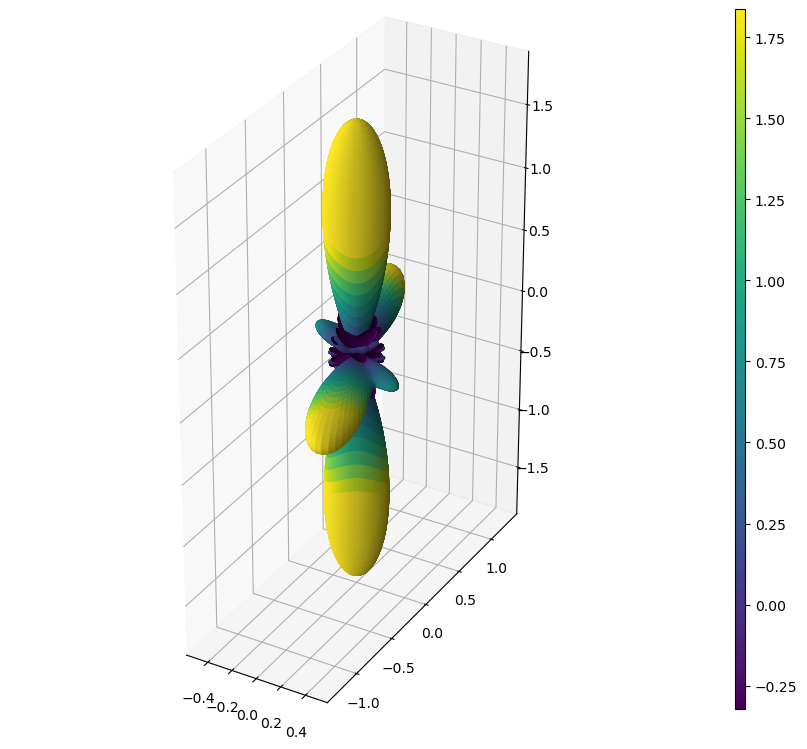

In [13]:
#%matplotlib qt

x, y, z, fcolors = get_spherical_function_values_from_spherical_expansion(fODFs[0],max_degree=8,resolution=200,min_value=None,max_value=None, normalize=False)

x = x * fcolors
y = y * fcolors
z = z * fcolors

fig = plt.figure(figsize=(10,10))

cmap = plt.cm.viridis
normalization = Normalize(vmin=np.min(fcolors), vmax=np.max(fcolors))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalization)

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=plt.cm.viridis(fcolors), shade=True)
#ax.set_axis_off()
plt.gca().set_aspect('equal')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sm, ax=[ax], cax=cbar_ax)

plt.show()

In [14]:
data[2][0]

array([[ 0.34009497, -0.94039109,  0.        ],
       [-0.80494066,  0.59335532,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])